In [0]:
from joblib import load
top_recs_df = load("/content/drive/My Drive/MScA/Machine Learning/ML Final Project/Data/cb_top_user_preds.joblib")

In [0]:
import pandas as pd
train_df = pd.read_pickle("/content/drive/My Drive/MScA/Machine Learning/ML Final Project/Data/Final Input Data/train_df_with_valid_recommendations.pkl")
validation_df = pd.read_pickle("/content/drive/My Drive/MScA/Machine Learning/ML Final Project/Data/Final Input Data/validation_df_with_valid_recommendations.pkl")
test_df = pd.read_pickle("/content/drive/My Drive/MScA/Machine Learning/ML Final Project/Data/Final Input Data/test_df_with_valid_recommendations.pkl")

In [0]:
train_df = train_df.merge(top_recs_df, how='left',on='reviewerID',right_index=False)
validation_df = train_df.merge(top_recs_df, how='left',on='reviewerID',right_index=False)
test_df = train_df.merge(top_recs_df, how='left',on='reviewerID',right_index=False)

In [0]:
# Calculate accuracy @ 1
train_df["accuracy_at_1"] = 0
for index, row in train_df.iterrows():
    train_df.loc[index, "accuracy_at_1"] = len(set(row["top_1_recommended"]).intersection(set(row["valid_recommendations"][:1])))/1

# Calculate accuracy @ 3
train_df["accuracy_at_3"] = 0
for index, row in train_df.iterrows():
    train_df.loc[index, "accuracy_at_3"] = len(set(row["top_3_recommended"]).intersection(set(row["valid_recommendations"][:3])))/3

# Calculate accuracy @ 5
train_df["accuracy_at_5"] = 0
for index, row in train_df.iterrows():
    train_df.loc[index, "accuracy_at_5"] = len(set(row["top_5_recommended"]).intersection(set(row["valid_recommendations"][:5])))/5

# Calculate accuracy @ 10
train_df["accuracy_at_10"] = 0
for index, row in train_df.iterrows():
    train_df.loc[index, "accuracy_at_10"] = len(set(row["top_10_recommended"]).intersection(set(row["valid_recommendations"][:10])))/10

# Calculate accuracy @ 15
train_df["accuracy_at_15"] = 0
for index, row in train_df.iterrows():
    train_df.loc[index, "accuracy_at_15"] = len(set(row["top_15_recommended"]).intersection(set(row["valid_recommendations"][:15])))/15

In [0]:
# Calculate accuracy @ 1
validation_df["accuracy_at_1"] = 0
for index, row in validation_df.iterrows():
    validation_df.loc[index, "accuracy_at_1"] = len(set(row["top_1_recommended_y"]).intersection(set(row["valid_recommendations"][:1])))/1

# Calculate accuracy @ 3
validation_df["accuracy_at_3"] = 0
for index, row in validation_df.iterrows():
    validation_df.loc[index, "accuracy_at_3"] = len(set(row["top_3_recommended_y"]).intersection(set(row["valid_recommendations"][:3])))/3

# Calculate accuracy @ 5
validation_df["accuracy_at_5"] = 0
for index, row in validation_df.iterrows():
    validation_df.loc[index, "accuracy_at_5"] = len(set(row["top_5_recommended_y"]).intersection(set(row["valid_recommendations"][:5])))/5

# Calculate accuracy @ 10
validation_df["accuracy_at_10"] = 0
for index, row in validation_df.iterrows():
    validation_df.loc[index, "accuracy_at_10"] = len(set(row["top_10_recommended_y"]).intersection(set(row["valid_recommendations"][:10])))/10

# Calculate accuracy @ 15
validation_df["accuracy_at_15"] = 0
for index, row in validation_df.iterrows():
    validation_df.loc[index, "accuracy_at_15"] = len(set(row["top_15_recommended_y"]).intersection(set(row["valid_recommendations"][:15])))/15

In [0]:
# Calculate accuracy @ 1
test_df["accuracy_at_1"] = 0
for index, row in test_df.iterrows():
    test_df.loc[index, "accuracy_at_1"] = len(set(row["top_1_recommended_y"]).intersection(set(row["valid_recommendations"][:1])))/1

# Calculate accuracy @ 3
test_df["accuracy_at_3"] = 0
for index, row in test_df.iterrows():
    test_df.loc[index, "accuracy_at_3"] = len(set(row["top_3_recommended_y"]).intersection(set(row["valid_recommendations"][:3])))/3

# Calculate accuracy @ 5
test_df["accuracy_at_5"] = 0
for index, row in test_df.iterrows():
    test_df.loc[index, "accuracy_at_5"] = len(set(row["top_5_recommended_y"]).intersection(set(row["valid_recommendations"][:5])))/5

# Calculate accuracy @ 10
test_df["accuracy_at_10"] = 0
for index, row in test_df.iterrows():
    test_df.loc[index, "accuracy_at_10"] = len(set(row["top_10_recommended_y"]).intersection(set(row["valid_recommendations"][:10])))/10

# Calculate accuracy @ 15
test_df["accuracy_at_15"] = 0
for index, row in test_df.iterrows():
    test_df.loc[index, "accuracy_at_15"] = len(set(row["top_15_recommended_y"]).intersection(set(row["valid_recommendations"][:15])))/15

In [0]:
import numpy as np

MAP_train = np.mean([np.mean(train_df["accuracy_at_3"]), 
                     np.mean(train_df["accuracy_at_5"]),
                     np.mean(train_df["accuracy_at_10"]),
                     np.mean(train_df["accuracy_at_15"])])

In [0]:
MAP_val = np.mean([np.mean(validation_df["accuracy_at_3"]), 
                     np.mean(validation_df["accuracy_at_5"]),
                     np.mean(validation_df["accuracy_at_10"]),
                     np.mean(validation_df["accuracy_at_15"])])

In [0]:
MAP_test = np.mean([np.mean(test_df["accuracy_at_3"]), 
                     np.mean(test_df["accuracy_at_5"]),
                     np.mean(test_df["accuracy_at_10"]),
                     np.mean(test_df["accuracy_at_15"])])

In [10]:
MAP_train

0.001128257549632972

In [11]:
MAP_val

0.001128257549632972

In [12]:
MAP_test

0.001128257549632972

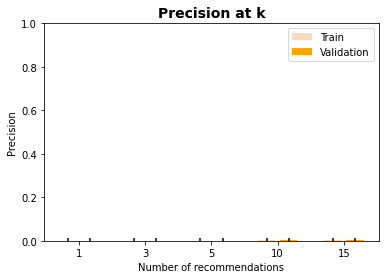

In [15]:
import matplotlib.pyplot as plt

# 5 values for K
x_train = [1, 4, 7, 10, 13]
x_val = [2, 5, 8, 11, 14]


# Training means
y_train = [np.mean(train_df["accuracy_at_1"]),
         np.mean(train_df["accuracy_at_3"]),
         np.mean(train_df["accuracy_at_5"]),
         np.mean(train_df["accuracy_at_10"]),
         np.mean(train_df["accuracy_at_15"])]

# Training stds
error_train = [np.std(train_df["accuracy_at_1"]),
             np.std(train_df["accuracy_at_3"]),
             np.std(train_df["accuracy_at_5"]),
             np.std(train_df["accuracy_at_10"]),
             np.std(train_df["accuracy_at_15"])]

# Validation means
y_val = [np.mean(validation_df["accuracy_at_1"]),
         np.mean(validation_df["accuracy_at_3"]),
         np.mean(validation_df["accuracy_at_5"]),
         np.mean(validation_df["accuracy_at_10"]),
         np.mean(validation_df["accuracy_at_15"])]

# Validation stds
error_val = [np.std(validation_df["accuracy_at_1"]),
             np.std(validation_df["accuracy_at_3"]),
             np.std(validation_df["accuracy_at_5"]),
             np.std(validation_df["accuracy_at_10"]),
             np.std(validation_df["accuracy_at_15"])]

# Plot errorbars
plt.bar(x = x_train, height = y_train, yerr = error_train, color = "peachpuff", label = "Train")
plt.bar(x = x_val, height = y_val, yerr = error_val, color = "orange", label = "Validation")

# Titles and axis labels
plt.title("Precision at k", fontweight = "bold", fontsize = 14)
plt.xlabel("Number of recommendations")
plt.ylabel("Precision")
plt.xticks(ticks = [1.5, 4.5, 7.5, 10.5, 13.5], labels = [1, 3, 5, 10, 15])
plt.ylim(top = 1, bottom = 0)

# Add legend
plt.legend()

# Show plot
plt.show()

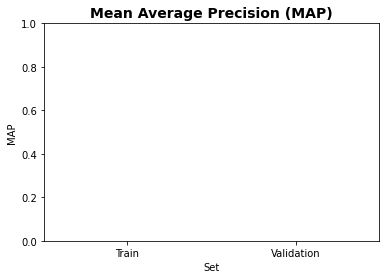

In [16]:
# Plot MAP
plt.bar(x = 1, height = MAP_train, color = "peachpuff", label = "Train")
plt.bar(x = 2, height = MAP_val, color = "orange", label = "Validation")

# Titles and axis labels
plt.title("Mean Average Precision (MAP)", fontweight = "bold", fontsize = 14)
plt.xlabel("Set")
plt.ylabel("MAP")
plt.ylim(bottom = 0, top = 1)
plt.xticks(ticks = [1, 2], labels = ["Train", "Validation"])

# Show plot
plt.show()